https://github.com/yanglianglu/Deep-Learning-in-Healthcare

# Before you use this template

This template is just a recommended template for project Report. It only considers the general type of research in our paper pool. Feel free to edit it to better fit your project. You will iteratively update the same notebook submission for your draft and the final submission. Please check the project rubriks to get a sense of what is expected in the template.

---

# FAQ and Attentions
* Copy and move this template to your Google Drive. Name your notebook by your team ID (upper-left corner). Don't eidt this original file.
* This template covers most questions we want to ask about your reproduction experiment. You don't need to exactly follow the template, however, you should address the questions. Please feel free to customize your report accordingly.
* any report must have run-able codes and necessary annotations (in text and code comments).
* The notebook is like a demo and only uses small-size data (a subset of original data or processed data), the entire runtime of the notebook including data reading, data process, model training, printing, figure plotting, etc,
must be within 8 min, otherwise, you may get penalty on the grade.
  * If the raw dataset is too large to be loaded  you can select a subset of data and pre-process the data, then, upload the subset or processed data to Google Drive and load them in this notebook.
  * If the whole training is too long to run, you can only set the number of training epoch to a small number, e.g., 3, just show that the training is runable.
  * For results model validation, you can train the model outside this notebook in advance, then, load pretrained model and use it for validation (display the figures, print the metrics).
* The post-process is important! For post-process of the results,please use plots/figures. The code to summarize results and plot figures may be tedious, however, it won't be waste of time since these figures can be used for presentation. While plotting in code, the figures should have titles or captions if necessary (e.g., title your figure with "Figure 1. xxxx")
* There is not page limit to your notebook report, you can also use separate notebooks for the report, just make sure your grader can access and run/test them.
* If you use outside resources, please refer them (in any formats). Include the links to the resources if necessary.

# Mount Notebook to Google Drive
Upload the data, pretrianed model, figures, etc to your Google Drive, then mount this notebook to Google Drive. After that, you can access the resources freely.

Instruction: https://colab.research.google.com/notebooks/io.ipynb

Example: https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q

Video: https://www.youtube.com/watch?v=zc8g8lGcwQU

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Introduction**

### **Background**

Family history is a crucial risk factor for many diseases, encapsulating shared genetic, environmental, and lifestyle factors. The widespread adoption of electronic health record (EHR) systems offers a unique opportunity to explore medical histories across family networks. However, traditional machine learning models for disease prediction often overlook the complex geometric structure of family history. The paper addresses this gap by leveraging Finland’s nationwide EHR system, which encompasses data from over 7 million individuals, including up to third-degree relatives.

#### **Type of Problem and Its Importance**

The study focuses on disease prediction, a critical area in healthcare that can benefit significantly from advanced data processing and feature engineering techniques. By accurately predicting disease risk from family history, healthcare providers can offer more personalized care and preventive measures, potentially reducing the incidence and impact of complex diseases. However, modeling the intricate relationships within family histories poses significant challenges, necessitating innovative approaches.

#### **Difficulty of the Problem**

The complexity of the problem lies in the multidimensional nature of family histories, including genetic relationships, environmental factors, and shared lifestyles, which are difficult to represent and analyze with traditional tabular data models. Moreover, the vast amount of potentially relevant variables contained in EHRs requires sophisticated methods to extract meaningful patterns for disease prediction.

#### **State of the Art Methods**

The paper compares its approach with clinically-inspired baselines and existing deep learning models, demonstrating the advantages of graph representation learning. Current methods either fail to capture the rich geometric relationships in family history or do not leverage the full potential of longitudinal medical records for disease prediction.

<br>

### **Paper Explanation**

#### **Proposed Method**

The paper proposes a graph-based deep learning model that constructs family graphs from EHRs to predict the 10-year onset of five complex diseases. This model integrates graph neural networks (GNNs) with long short-term memory networks (LSTMs) to learn explainable, supervised representations of family history’s impact on disease risk.

#### **Innovations**

A key innovation is the application of graph representation learning to model the geometric structure of family history, offering a more nuanced understanding of disease risk factors. Additionally, the use of graph explainability techniques allows for the identification of critical relatives and medical features influencing disease prediction.

#### **Effectiveness**

The method outperforms both clinically-inspired and deep learning baselines in predicting disease onset, showcasing its superior ability to capture and utilize the complex information embedded in family history.

#### **Contribution**

This research significantly advances the use of machine learning in healthcare by demonstrating how graph-based models can effectively incorporate family history into disease risk prediction. It provides a scalable, disease-agnostic tool that enhances the predictive power and personalization of healthcare interventions.


# Scope of Reproducibility
### Hypotheses:
1. **Family history enhances disease risk prediction**: The inherent geometric structure of family history, which encapsulates genetic, environmental, and lifestyle factors, can improve the prediction accuracy for complex diseases when modeled with graph-based deep learning techniques.

2. **Graph neural networks (GNNs) outperform traditional models**: For modeling family history, GNNs, particularly when combined with long short-term memory networks (LSTMs), will yield superior predictive performance for disease onset compared to clinically-inspired and deep learning baselines that do not utilize the geometric structure of family history.

3. **GNN-LSTM model identifies relevant medical features and relatives**: The GNN-LSTM model, through explainability techniques, can effectively identify the most relevant medical features and relatives that contribute to an individual's disease risk, providing insights that are more personalized and clinically relevant.

### Corresponding Experiments:

1. **Comparison with clinical baselines**: To test the hypothesis that family history enhances disease risk prediction, experiments were conducted comparing the predictive performance of your graph-based models (both GNN and GNN-LSTM) against two clinical baselines across five complex diseases. This involved evaluating metrics such as AUC-ROC, AUC-PRC, and MCC.

2. **Ablation studies**: To evaluate the contribution of different components (family history, graph connectivity, and longitudinal EHR data) to the predictive performance, ablation studies were performed. These studies helped in understanding the individual and combined effects of modeling family history through GNNs and the inclusion of longitudinal medical records via LSTMs.

3. **Synthetic data experiments**: These experiments were designed to further test the efficacy of GNNs in capturing heritable aspects of diseases by simulating phenotypes with varying degrees of heritability. This helped in isolating the performance gains attributed to the modeling of genetic relationships within families.

4. **Explainability analysis**: To validate the hypothesis that GNN-LSTM can identify relevant features and relatives, explainability techniques were applied to the model predictions. This involved analyzing the supervised node embeddings and feature importances to uncover the model's rationale behind its predictions.


# Methodology

This methodology is the core of your project. It consists of run-able codes with necessary annotations to show the expeiment you executed for testing the hypotheses.

The methodology at least contains two subsections **data** and **model** in your experiment.

In [ ]:
# import  packages you need
import numpy as np
from google.colab import drive


##  Data

This model leverages intricate familial relationships and health data to predict health outcomes within family cohorts. It necessitates the submission of four specific input files, each designed to encapsulate different dimensions of the data: patient cohorts identification, features for model training, and familial connections.

## 1. Maskfile

The Maskfile is pivotal for distinguishing between different groups of samples within the data. It serves a dual purpose:
- **Cohort Specification**: It identifies which samples (individuals) are part of the target cohort, the primary subjects for whom the health outcomes will be predicted. Additionally, it distinguishes these from the graph cohort, which encompasses the relatives of the target patients. This differentiation is crucial for constructing the family graphs accurately.
- **Data Split Specification**: It delineates how the dataset is divided into training, validation, and test sets, ensuring a structured approach to model training and evaluation. This organization is essential for the model to learn from specific data segments and then validate and test its predictive power on unseen data.

Each row of the file represents a patient, with the following column structure:
- PATIENTID: A unique (string or float) identifier for the patient. Doesn't follow any formatting requirements, so it can be specific to your dataset
- train: Specifies whether the patient is in the train/validation/test sets. Possible values are 0=train, 1=validation, 2=test, -1=ignore. Non-target patients should be set to -1
- graph: Specifies whether the patient is a graph sample, i.e., a target sample or a relative of at least one target sample. Possible values are 1=graph patient, 0=non-graph patient
- target: Specifies whether the patient is a target sample, i.e., the set of patients for which the algorithm is learning to predict health outcomes. Possible values are 1=target patient, 0=non-target patient
- node_id: A unique identifier for the patient, indexed from 0, in ascending order, i.e., 0, 1, ...

Example:

| PATIENTID | train | graph | target | node_id |
|---|---|---|---|---|
| ID0001 | 0 | 1 | 1 | 0 |
| ID0002 | 1 | 1 | 1 | 1 |
| ID0003 | 2 | 1 | 1 | 2 |
| ID0004 | -1 | 1 | 0 | 3 |
| ID0005 | -1 | 1 | 0 | 4 |

## 2. Statfile

The Statfile contains the core dataset utilized for model training, including:
- **Static Node Features**: These are the attributes or characteristics of individuals that do not change over time or across different observations. The Statfile includes these features for all samples across both the target and graph cohorts, providing a comprehensive dataset for the model.
- **Prediction Labels**: It also includes the outcome variable for the binary classification task, essentially the health outcome the model aims to predict. This file's structure allows for a direct association between static features and health outcomes, facilitating the model's learning process.

Each row represents the feature and label data for a patient. The only required columns are `PATIENTID` (corresponding to the same patient identifiers used in the `Maskfile`) and a column for the (binary classification) label. Other columns for the features can use any names that you want and if a column name isn't specified in the `Featfile` then the code will ignore the feature during training. The `Statfile` should include all the same patients and in the same order as the `Maskfile`.

Example:

| PATIENTID | healthOutcome | age | sex | medicalHistory |
|---|---|---|---|---|
| ID0001 | 0 | 34 | 1 | 0 |
| ID0002 | 1 | 43 | 0 | 0 |
| ID0003 | 0 | 24 | 1 | 0 |
| ID0004 | 1 | 50 | 1 | 1 |
| ID0005 | 0 | 65 | 0 | 0 |

## 3. Featfile

The Featfile is a blueprint that outlines which features should be fed into the model during the training phase. It categorizes features into four types, each serving a unique purpose in the model's architecture:
- **Static Features**: Attributes that remain constant for each individual.
- **Longitudinal Features**: Attributes that could change over time or across different observations for the same individual.
- **Label Features**: The outcome variable(s) that the model aims to predict.
- **Edge Features**: Attributes that describe the relationships between individuals within the family graphs, such as the strength or type of familial connection.

This file ensures that the model can distinguish between different types of data and utilize them appropriately during the training and prediction phases.

Each row of the file represents a feature in the dataset, with the following column structure:
- name:  The name of the feature. Note: `static` and `label` feature names should exist as columns in the `Statfile`, `edge` feature names should exist as columns in the `Edgefile`. See the note in the Models section for `longitudinal` features.
- type: The feature type, with possible values being `label`, `static`, `longitudinal` and `edge`. The `static` and `longitudinal` features correspond to different types of node features in the graph, the `edge` features correspond to edge features (weights) in the graph, and the `label` corresponds to the variable being predicted

Example:

| name | type |
|---|---|
|healthOutcome|label|
|age|static|
|sex|static|
|medicalHistory|static|
|relatednessWeight|edge|

## 4. Edgefile

The Edgefile is critical for constructing the familial networks within the dataset. It includes:
- **Edge Pairs**: These represent the connections between individuals within the family graphs. Each pair indicates a relationship that is crucial for mapping out the family structure.
- **Edge Features**: Additional data that provide context or describe the nature of each familial connection, such as the strength of the relationship.

This file allows the model to understand and visualize the complex web of familial relationships, which is essential for analyzing how these connections might influence health outcomes.

See details for the format of each file type below.

Each row represents an edge pair in a target patient's (undirected) family graph, with the following column structure:
- node1: The identifier for the first patient in the edge pair, corresponding to a `node_id` from the `Maskfile`
- node2: The identifier for the second patient in the edge pair, corresponding to a `node_id` from the `Maskfile`
- target_patient: The identifier for the target patient, corresponding to a `node_id` from the `Maskfile`. The code assumes that the edge `(node1, node2)` belongs to the family graph for this target patient
- weight: The edge weight
- ... (additional columns for edge features are optional)

Example:

| node1 | node2 | target_patient | weight |
|---|---|---|---|
| 0 | 1 | 0 | 0.5 |
| 0 | 3 | 0 | 0.25 |
| 1 | 0 | 1 | 0.5 |
| 1 | 2 | 1 | 0.25 |
| 1 | 4 | 1 | 0.25 |
| 2 | 4 | 1 | 0.5 |

In [ ]:
!wget https://raw.githubusercontent.com/dsgelab/family-EHR-graphs/main/test/Gen3_50k_0.7_142857_edgefile.csv
!wget https://raw.githubusercontent.com/dsgelab/family-EHR-graphs/main/test/Gen3_50k_0.7_142857_maskfile.csv
!wget https://raw.githubusercontent.com/dsgelab/family-EHR-graphs/main/test/Gen3_50k_0.7_142857_statfile.csv
!wget https://raw.githubusercontent.com/dsgelab/family-EHR-graphs/main/test/featfiles/featfile_A5.csv

--2024-04-07 01:51:59--  https://raw.githubusercontent.com/dsgelab/family-EHR-graphs/main/test/Gen3_50k_0.7_142857_edgefile.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74242425 (71M) [text/plain]
Saving to: ‘Gen3_50k_0.7_142857_edgefile.csv’

Gen3_50k_0.7_142857 100%[===================>]  70.80M   159MB/s    in 0.4s    

2024-04-07 01:52:02 (159 MB/s) - ‘Gen3_50k_0.7_142857_edgefile.csv’ saved [74242425/74242425]

--2024-04-07 01:52:02--  https://raw.githubusercontent.com/dsgelab/family-EHR-graphs/main/test/Gen3_50k_0.7_142857_maskfile.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443...

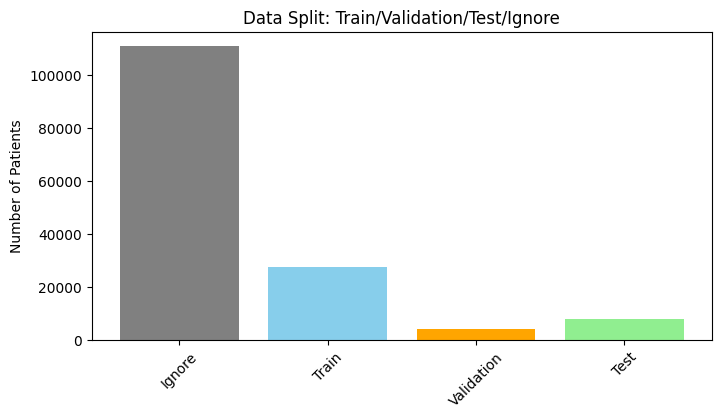

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx

# Load the mask file for analysis
maskfile_path = 'Gen3_50k_0.7_142857_maskfile.csv'
maskfile = pd.read_csv(maskfile_path)

train_categories = {-1: 'Ignore', 0: 'Train', 1: 'Validation', 2: 'Test'}
maskfile['train_category'] = maskfile['train'].map(train_categories)

train_counts_corrected = maskfile['train_category'].value_counts().reindex(train_categories.values(), fill_value=0)

# Recreating the visualizations with the corrected approach

# Data Split Specification (Train, Validation, Test, Ignore)
plt.figure(figsize=(8, 4))
plt.bar(train_counts_corrected.index, train_counts_corrected.values, color=['grey', 'skyblue', 'orange', 'lightgreen'])
plt.title('Data Split: Train/Validation/Test/Ignore')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()


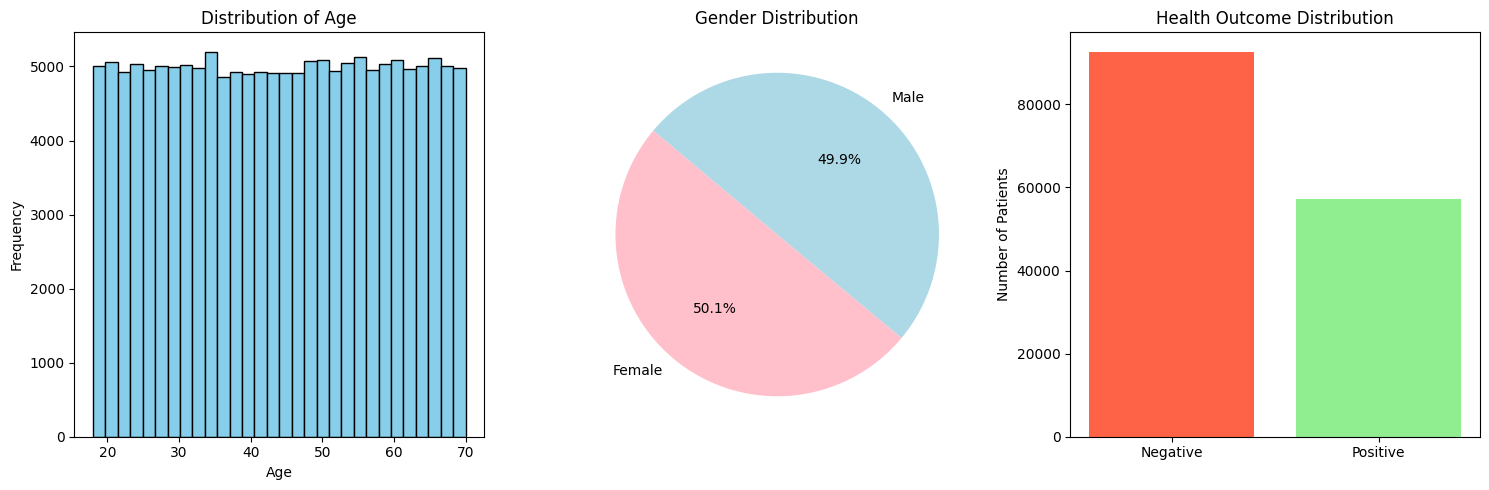

In [ ]:
# Load the stat file for analysis
statfile_path = 'Gen3_50k_0.7_142857_statfile.csv'
statfile = pd.read_csv(statfile_path)

# Visualization 1: Distribution of Age
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(statfile['maxAgeDoI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Visualization 2: Gender Distribution
gender_counts = statfile['Gender'].value_counts().sort_index()
gender_labels = ['Female', 'Male']  # Assuming 0=Female, 1=Male
plt.subplot(1, 3, 2)
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=['pink', 'lightblue'])
plt.title('Gender Distribution')

# Visualization 3: Health Outcome Distribution
outcome_counts = statfile['EndPtStat'].value_counts().sort_index()
outcome_labels = ['Negative', 'Positive']  # Assuming 0=Negative, 1=Positive outcome
plt.subplot(1, 3, 3)
plt.bar(outcome_labels, outcome_counts, color=['tomato', 'lightgreen'])
plt.title('Health Outcome Distribution')
plt.ylabel('Number of Patients')

plt.tight_layout()
plt.show()

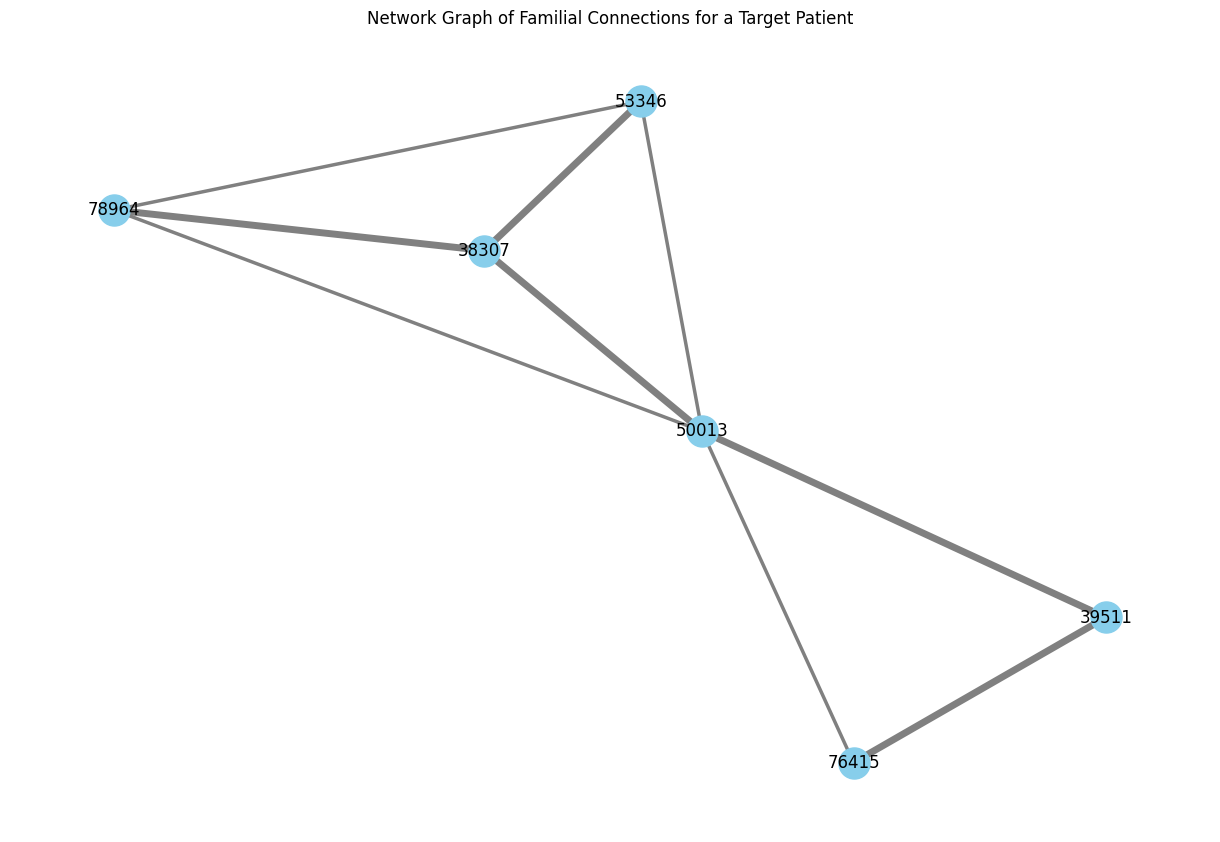

In [ ]:
# Load the edge file
# Note: You need to upload the file to your Google Colab session first or access it from Google Drive.
edgefile_path = 'Gen3_50k_0.7_142857_edgefile.csv'
edgefile = pd.read_csv(edgefile_path)

# Select a subset of the edgefile focused around a specific target patient
# For simplicity and visualization purposes, we will select a target patient and related edges
target_patient_id = edgefile['target_patient'].iloc[0]  # Example: Select the first target patient
subset_edgefile = edgefile[edgefile['target_patient'] == target_patient_id]

# Create a graph
G = nx.Graph()

# Add edges and nodes to the graph from the subset
for _, edge in subset_edgefile.iterrows():
    G.add_edge(edge['node1'], edge['node2'], weight=edge['weight'])

# Generate positions for each node using the Spring layout to visually separate nodes
pos = nx.spring_layout(G, seed=42)

# Draw the network graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='grey', node_size=500, width=[float(d['weight']*10) for (u, v, d) in G.edges(data=True)])
plt.title('Network Graph of Familial Connections for a Target Patient')
plt.show()

## Data Preprocessing

In [43]:
!pip install pytorch
!pip install torch-geometric
!pip torchmetrics
!pip install matplotlib
!pip install networkit
!pip install seaborn
!pip install torch-cluster
!pip install pyg-lib torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.0+cu102.html


/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773277 sha256=7f812233d20081fbc4cc7daa2a8677d5225bfc4af8fc58f0a5f8b7e41a91d9d5
  Stored in directory: /root/.cache/pip/wheels/c8/e4/83/5e964867e23f8a61cb8c5d5b9477617b710e96e6ebf1844562
Successfully built torch-geometric
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 32.4 MB/s eta 0:00:00
/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-cluster: filename=torch_cluster-1.6.3-cp310-cp310-linux_x86_64.whl size=714413 sha256=5be3dc7436069462c90170a5f681f698dff8117044b357fa44ab634b5fe65393
  Stored in

In [42]:
import torch
import torch_geometric
import sqlite3
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from torch_geometric.data import Dataset as GraphDataset
from torch_geometric.data import Batch
from random import choices


class DataFetch():
    """
    Class for fetching and formatting data

    Expects a tensor list of patients encoded using the numerical node_ids

    Assumes maskfile, statfile rows are indexed in order of these node_ids (0, 1, ... num_samples)
    and they include data for both the target and graph samples (retrieve data using .iloc)

    The edgefile only needs to include data for the target samples, and is indexed
    using the node_ids (retrieve data using .loc)

    Note that the featfile has exactly one label, corresponding to the label column name in the statfile

    Note if the input is a directed graph the code converts it to an undirected graph

    Parameters:
    maskfile, featfile, statfile and edgefile are filepaths to csv files
    sqlpath is the path to the sql database
    params is a dictionary of additional parameters (obs_window_start, obs_window_end)
    """
    def __init__(self, maskfile, featfile, statfile, edgefile, sqlpath, params, alt_featfile=None, local=False):
        feat_df = pd.read_csv(featfile)
        self.local = local
        self.static_features = feat_df[feat_df['type']=='static']['name'].tolist()
        self.longitudinal_features = feat_df[feat_df['type']=='longitudinal']['name'].tolist()
        self.edge_features = feat_df[feat_df['type']=='edge']['name'].tolist()
        # some gnn layers only support a single edge weight
        if params['gnn_layer'] in ['gcn', 'graphconv']: self.edge_features=['weight']
        self.label_key = feat_df[feat_df['type']=='label']['name'].tolist()[0]
        self.static_data = torch.tensor(pd.read_csv(statfile)[self.static_features].values, dtype=torch.float)
        self.label_data = torch.tensor(pd.read_csv(statfile)[self.label_key].to_numpy(), dtype=torch.float32)
        if len(self.longitudinal_features)>0 and not self.local: self.conn = sqlite3.connect(sqlpath)
        self.params = params

        if params['model_type'] in ['graph', 'graph_no_target', 'explainability']:
            # can specify a different feature set using alt_featfile
            alt_feat_df = pd.read_csv(alt_featfile)
            self.alt_static_features = alt_feat_df[alt_feat_df['type']=='static']['name'].tolist()
            self.alt_static_data = torch.tensor(pd.read_csv(statfile)[self.alt_static_features].values, dtype=torch.float)

        mask_df = pd.read_csv(maskfile)
        self.id_map = dict(zip(mask_df['node_id'], mask_df['PATIENTID']))
        self.train_patient_list = torch.tensor(mask_df[mask_df['train']==0]['node_id'].to_numpy())
        self.validate_patient_list = torch.tensor(mask_df[mask_df['train']==1]['node_id'].to_numpy())
        self.test_patient_list = torch.tensor(mask_df[mask_df['train']==2]['node_id'].to_numpy())
        self.num_samples_train_minority_class = torch.sum(self.label_data[self.train_patient_list]==1).item()
        self.num_samples_train_majority_class = torch.sum(self.label_data[self.train_patient_list]==0).item()
        self.num_samples_valid_minority_class = torch.sum(self.label_data[self.validate_patient_list]==1).item()
        self.num_samples_valid_majority_class = torch.sum(self.label_data[self.validate_patient_list]==0).item()

        if params['model_type']!='baseline':
            self.edge_df = pd.read_csv(edgefile)
            self.edge_df = self.edge_df.groupby('target_patient').agg(list)

    def get_static_data(self, patients):
        x_static = self.static_data[patients]
        y = self.label_data[patients]
        return x_static, y

    def get_alt_static_data(self, patients):
        x_static = self.alt_static_data[patients]
        return x_static

    def get_longitudinal_data(self, patients):
        if self.local:
            # return simulated data for local testing
            num_nodes = len(patients)
            num_years = self.params['obs_window_end']-self.params['obs_window_start']+1
            num_features = len(self.longitudinal_features)
            num_data = int(num_nodes*num_years*num_features*0.01)
            i = [choices(range(num_nodes),k=num_data), choices(range(num_years),k=num_data), choices(range(num_features),k=num_data)]
            v = [1]*num_data
            x_longitudinal = torch.sparse_coo_tensor(i, v, (num_nodes, num_years, num_features), dtype=torch.float32)
            x_longitudinal_dense = x_longitudinal.to_dense()
        else:
            # fetch data from SQLite database
            id_list = [self.id_map[patient.item()] for patient in patients]
            data = pd.DataFrame()
            for patient in id_list:
                command = "SELECT PATIENTID, EVENT_YEAR, ENDPOINT FROM long WHERE PATIENTID='{}'".format(patient)
                data = pd.concat([data, pd.read_sql_query(command, self.conn)])
            data = data[data['ENDPOINT'].isin(self.longitudinal_features)]

            # limit to observation window years
            data['EVENT_YEAR'] = data['EVENT_YEAR'].astype(int)
            data = data[(data['EVENT_YEAR']>=self.params['obs_window_start'])&(data['EVENT_YEAR']<=self.params['obs_window_end'])]

            # map to index positions
            node_index = dict(zip(id_list, range(len(id_list))))
            year_index = dict(zip(np.arange(self.params['obs_window_start'], self.params['obs_window_end']+1), range(self.params['obs_window_end']-self.params['obs_window_start']+1)))
            feat_index = dict(zip(self.longitudinal_features, range(len(self.longitudinal_features))))
            data['PATIENTID'] = data['PATIENTID'].map(node_index)
            data['EVENT_YEAR'] = data['EVENT_YEAR'].map(year_index)
            data['ENDPOINT'] = data['ENDPOINT'].map(feat_index)

            # create sparse tensor
            i = [data['PATIENTID'].tolist(), data['EVENT_YEAR'].tolist(), data['ENDPOINT'].tolist()]
            v = [1]*len(data)
            x_longitudinal = torch.sparse_coo_tensor(i, v, (len(node_index), len(year_index), len(feat_index)), dtype=torch.float32)
            x_longitudinal_dense = x_longitudinal.to_dense()

        return x_longitudinal_dense

    def get_relatives(self, patients):
        """Returns a list of node ids included in any of these patient graphs
        """
        return torch.tensor(list(set([i for list in self.edge_df.loc[patients]['node1'].to_list() for i in list] + [i for list in self.edge_df.loc[patients]['node2'].to_list() for i in list])))

    def construct_patient_graph(self, patient, all_relatives, all_x_static, all_y, all_x_longitudinal=None):
        """Creates a re-indexed pytorch geometric data object for the patient
        """
        # order nodes and get indices in all_relatives to retrieve feature data
        node_ordering = np.asarray(list(set(self.edge_df.loc[patient].node1 + self.edge_df.loc[patient].node2)))
        node_indices = [list(all_relatives.tolist()).index(value) for value in node_ordering]
        x_static = all_x_static[node_indices]
        y = all_y[list(all_relatives.tolist()).index(patient)] # predicting single value for each graph

        # reindex the edge indices from 0, 1, ... num_nodes
        node1 = [list(node_ordering.tolist()).index(value) for value in self.edge_df.loc[patient].node1]
        node2 = [list(node_ordering.tolist()).index(value) for value in self.edge_df.loc[patient].node2]
        edge_index = torch.tensor([node1,node2], dtype=torch.long)
        edge_weight = torch.t(torch.tensor(self.edge_df.loc[patient][self.edge_features], dtype=torch.float))

        data = torch_geometric.data.Data(x=x_static, edge_index=edge_index, y=y, edge_attr=edge_weight)
        transform = torch_geometric.transforms.ToUndirected(reduce='mean')
        data = transform(data)
        if all_x_longitudinal is not None: data.x_longitudinal = all_x_longitudinal[node_indices]
        data.target_index = torch.tensor(list(node_ordering.tolist()).index(patient))
        return data


class Data(Dataset):
    def __init__(self, patient_list, fetch_data):
        """
        Loads non-graph datasets for a given list of patients
        Returns (x_static, x_longitudinal, y) if longitudinal data included, else (x_static, y)
        """
        self.patient_list = patient_list
        self.num_target_patients = len(patient_list)
        self.fetch_data = fetch_data
        self.include_longitudinal = len(fetch_data.longitudinal_features)>0

    def __getitem__(self, patients):
        batch_patient_list = self.patient_list[patients]
        x_static, y = self.fetch_data.get_static_data(batch_patient_list)
        if self.include_longitudinal:
            x_longitudinal = self.fetch_data.get_longitudinal_data(batch_patient_list)
            return x_static, x_longitudinal, y
        else:
            return x_static, y

    def __len__(self):
        return self.num_target_patients


class GraphData(GraphDataset):
  def __init__(self, patient_list, fetch_data):
      """
      Loads a batch of multiple patient graphs
      """
      self.patient_list = patient_list
      self.num_target_patients = len(patient_list)
      self.fetch_data = fetch_data
      self.include_longitudinal = len(fetch_data.longitudinal_features)>0

  def __getitem__(self, patients):
      # returns multiple patient graphs by constructing a pytorch geometric Batch object
      batch_patient_list = self.patient_list[patients]
      data_list = []

      # it's more efficient to fetch feature data for all patients and their relatives,
      # and then split into separate graphs
      all_relatives = self.fetch_data.get_relatives(batch_patient_list)
      all_x_static, all_y = self.fetch_data.get_static_data(all_relatives)
      patient_x_static = self.fetch_data.get_alt_static_data(batch_patient_list)
      if self.include_longitudinal: all_x_longitudinal = self.fetch_data.get_longitudinal_data(all_relatives)
      else: all_x_longitudinal = None

      patient_index = 0
      for patient in batch_patient_list:
        patient_graph = self.fetch_data.construct_patient_graph(patient.item(), all_relatives, all_x_static, all_y, all_x_longitudinal)
        patient_graph.patient_x_static = patient_x_static[patient_index].reshape(1,-1)
        if self.include_longitudinal:
            patient_x_longitudinal = patient_graph.x_longitudinal[patient_graph.target_index]
            patient_graph.patient_x_longitudinal = patient_x_longitudinal[None,:,:]
        data_list.append(patient_graph)
        patient_index += 1

      batch_data = Batch.from_data_list(data_list)
      return batch_data

  def __len__(self):
      return self.num_target_patients

ModuleNotFoundError: No module named 'torch_geometric'

## Data Loading

In [ ]:
import torch
from torch_geometric.loader import DataLoader

# Simulated command line arguments (replace with actual paths and parameters as needed)
args = {
    'featfile': 'featfile_A5.csv',
    'maskfile': 'Gen3_50k_0.7_142857_maskfile.csv',
    'statfile': 'Gen3_50k_0.7_142857_statfile.csv',
    'edgefile': 'Gen3_50k_0.7_142857_edgefile.csv',
    'sqlpath': '',
    'batchsize': 64,
    'model_type': 'baseline',  # or 'graph' based on your model architecture
    'local_test': True  # Set to True if you want to use simulated data
}

# Mock parameters based on args
params = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'batchsize': 64,
    'local_test': True,
    'gnn_layer': 'graphconv',
    'model_type': 'baseline',
}
# Initialize DataFetch object for data preprocessing
fetch_data = DataFetch(args['maskfile'], args['featfile'], args['statfile'], args['edgefile'], args['sqlpath'], params, local=params['local_test'])

# Create DataLoaders for train, validate, and test datasets
train_loader = DataLoader(Data(fetch_data.train_patient_list, fetch_data), batch_size=params['batchsize'])
validate_loader = DataLoader(Data(fetch_data.validate_patient_list, fetch_data), batch_size=params['batchsize'])
test_loader = DataLoader(Data(fetch_data.test_patient_list, fetch_data), batch_size=params['batchsize'])


##   Model
The model includes the model definitation which usually is a class, model training, and other necessary parts.
  * Model architecture: layer number/size/type, activation function, etc
  * Training objectives: loss function, optimizer, weight of each loss term, etc
  * Others: whether the model is pretrained, Monte Carlo simulation for uncertainty analysis, etc
  * The code of model should have classes of the model, functions of model training, model validation, etc.
  * If your model training is done outside of this notebook, please upload the trained model here and develop a function to load and test it.

### Baseline

- **Linear Transformation Layers**: These layers are responsible for applying affine transformations to the input features, increasing the model's capacity to learn complex relationships within the data.

- **ReLU Activation Function**: The Rectified Linear Unit (ReLU) introduces non-linearity to the model, enabling it to capture complex patterns beyond what linear models can achieve.

- **Dropout Layer**: This layer randomly sets a portion of its input features to zero during training, acting as a form of regularization to prevent overfitting by ensuring that the model does not rely too heavily on any single input feature.

- **Sigmoid Activation Function**: The sigmoid function is used in the final step to squash the output of the last linear layer to a probability score between 0 and 1, indicating the likelihood of the instance belonging to the positive class.

### Operational Workflow:

1. **Input Processing**: The model starts by receiving static input features, `x_static`, which represent the data for each instance to be classified.

2. **First Linear Transformation and Activation**: The input features undergo an initial linear transformation (via `self.static_linear1`), followed by a ReLU activation. This step begins the process of extracting relevant patterns from the data.

3. **Second Linear Transformation and Activation**: The output from the first layer is further transformed and processed through another linear layer (`self.static_linear2`) and ReLU activation. This continuation allows the model to build upon the initial representations and learn more complex features.

4. **Dropout Application**: The dropout layer then randomly zeros out a portion of the features from the second layer's output. This regularization technique helps to ensure the model's generalizability by reducing its dependence on particular features or patterns that might be overly represented in the training data.

5. **Final Transformation and Output**: A final linear transformation is applied to the dropout layer's output to produce a single value per instance, which is passed through a sigmoid function to yield a probability score. This score represents the model's prediction regarding the likelihood of each instance being in the positive class.

6. **Output Prediction**: The final output, `out`, is thus a probability that the input instance belongs to the positive class, making it suitable for tasks such as disease presence prediction, customer churn prediction, or any binary outcome prediction.

In [ ]:
class Baseline(torch.nn.Module):
    def __init__(self, num_features_static, hidden_dim, dropout_rate):
        super().__init__()
        self.static_linear1 = nn.Linear(num_features_static, hidden_dim)
        self.static_linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.final_linear = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x_static):
        linear_out = self.relu(self.static_linear1(x_static))
        linear_out = self.relu(self.static_linear2(linear_out))
        linear_out = self.dropout(linear_out)
        out = self.sigmoid(self.final_linear(linear_out))
        return out

### BaselineLongitudinal

- **Long Short-Term Memory (LSTM) Network**: Captures temporal dependencies in longitudinal data through a bidirectional LSTM, enabling the model to incorporate information from both past and future contexts of the sequence. This approach enriches the feature representation with a comprehensive temporal perspective.

- **Linear Transformation and Activation Layers**: Processes the concatenated static and longitudinal features through a sequence of linear layers and ReLU (Rectified Linear Unit) activations. This setup transforms the combined feature vector into a representation suitable for classification.

- **Dropout Layer**: Implements dropout as a regularization technique, randomly setting a fraction of the input features to zero during training. This prevents the model from overfitting to the training data, encouraging the development of a more generalized model.

- **Output Layer**: A final linear layer followed by a sigmoid activation function produces a probability score, representing the model's confidence in the presence of the target condition or class.

### Operational Workflow:

1. **Longitudinal Data Processing**: The LSTM layer processes the longitudinal features, `x_longitudinal`, capturing temporal dynamics. The bidirectionality of the LSTM ensures that temporal dependencies are understood in both directions, enhancing the model's ability to make informed predictions based on the sequence of events.

2. **Combining LSTM Output**: The final hidden states from both directions of the LSTM are concatenated to form a comprehensive temporal feature vector. This step integrates information from the entire sequence, providing a robust representation of the longitudinal data.

3. **Combining Static and Longitudinal Features**: This temporal feature vector is then concatenated with the static features, `x_static`, merging time-varying and time-invariant information into a single combined feature vector. This integration allows the model to consider both the current state and historical trends of the input features.

4. **Feature Processing**: The combined feature vector is processed through two linear transformation layers, each followed by a ReLU activation. This processing introduces non-linearity, allowing the model to learn complex relationships between the features. A dropout layer follows the second linear transformation to mitigate overfitting.

5. **Output Prediction**: Finally, the processed feature vector is passed through a linear layer and a sigmoid activation function, converting the model's output to a probability score between 0 and 1. This score indicates the likelihood of the positive class, enabling binary classification based on the combined static and longitudinal input data.

In [ ]:
class BaselineLongitudinal(torch.nn.Module):
    def __init__(self, num_features_static, num_features_longitudinal, main_hidden_dim, lstm_hidden_dim, dropout_rate, num_lstm_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(num_features_longitudinal, lstm_hidden_dim, num_lstm_layers, batch_first=True, bidirectional=True, bias=False)
        self.lstm_hidden_dim = lstm_hidden_dim
        self.combined_linear1 = nn.Linear(num_features_static + lstm_hidden_dim*2, main_hidden_dim)
        self.combined_linear2 = nn.Linear(main_hidden_dim, main_hidden_dim)
        self.final_linear = nn.Linear(main_hidden_dim, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x_static, x_longitudinal):
        output, (hn, cn) = self.lstm(x_longitudinal)
        hn_bi = torch.cat((hn[0],hn[1]), dim=1)
        longitudinal_out = self.relu(hn_bi)
        x_cat = torch.cat((x_static, longitudinal_out), 1)
        linear_out = self.relu(self.combined_linear1(x_cat))
        linear_out = self.relu(self.combined_linear2(linear_out))
        linear_out = self.dropout(linear_out)
        out = self.sigmoid(self.final_linear(linear_out))
        return out

### GNN

- **Static Feature Processing**: The model accepts two types of static features: individual-specific (`num_features_static_node`) and graph-structured data representing relational or familial information (`num_features_static_graph`).

- **GNN Layers**: Offers flexibility in processing graph data through multiple GNN layer options (`GCNConv`, `GraphConv`, `GATConv`). The choice of GNN layer affects the aggregation of neighbor node features, capturing the structural properties of the graph.

- **Pooling Mechanisms**: Implements a range of global pooling strategies (`global_add_pool`, `global_mean_pool`, `TopKPooling`, `SAGPooling`) to aggregate node features into a fixed-size representation suitable for downstream classification tasks.

- **Dropout and Linear Transformation**: Utilizes dropout for regularization and linear layers followed by non-linear activations (ReLU, Sigmoid) to process and integrate features for prediction.

### Operational Workflow

1. **Patient-specific Data Processing**:
   - The model initially processes individual patient data (`x_static_node`) through two linear layers with ReLU activations, transforming and introducing non-linearity to the static node features.
   - A dropout layer is applied post-transformation to mitigate overfitting.

2. **Family Graph Data Processing**:
   - The `gnn_layer` selection dictates the type of GNN layer used to process the graph-structured data (`x_static_graph`, `edge_index`, `edge_weight`), enabling feature aggregation from node neighbors based on the graph's topology.
   - Successive applications of the chosen GNN layer and ReLU activations enrich the node features with contextual information from the graph.

3. **Combining Patient and Family Representations**:
   - The model concatenates the processed patient-specific and family graph representations, creating a unified feature vector.
   - This vector undergoes further linear transformation and activation, refining the features for the final prediction phase.

4. **Final Prediction**:
   - A sigmoid activation layer transforms the refined feature vector into a probability score, indicating the model's prediction for the binary classification task (e.g., disease onset likelihood).

5. **Separate Output Heads**:
   - Separate sigmoid-activated output heads for patient-specific and family-specific data are included, potentially allowing for loss calculation adjustments or analyses focused on individual versus relational data impacts.


In [ ]:
class GNN(torch.nn.Module):
    def __init__(self, num_features_static_graph, num_features_static_node, hidden_dim, gnn_layer, pooling_method, dropout_rate, ratio):
        super().__init__()
        self.pooling_method = pooling_method
        self.static_linear1 = nn.Linear(num_features_static_node, hidden_dim)
        self.static_linear2 = nn.Linear(hidden_dim, hidden_dim)

        # which gnn layer to use is specified by input argument
        if gnn_layer=='gcn':
            print("Using GCN layers")
            self.conv1 = gnn.GCNConv(num_features_static_graph, hidden_dim)
            self.conv2 = gnn.GCNConv(hidden_dim, hidden_dim)
        if gnn_layer=='graphconv':
            print("Using GraphConv layers")
            self.conv1 = gnn.GraphConv(num_features_static_graph, hidden_dim)
            self.conv2 = gnn.GraphConv(hidden_dim, hidden_dim)
        elif gnn_layer=='gat':
            print("Using GAT layers")
            self.conv1 = gnn.GATConv(num_features_static_graph, hidden_dim)
            self.conv2 = gnn.GATConv(hidden_dim, hidden_dim)

        self.pre_final_linear = nn.Linear(2*hidden_dim, hidden_dim)
        self.final_linear_com = nn.Linear(hidden_dim, 1)
        self.final_linear = nn.Linear(hidden_dim, 1)
        self.final_linear1 = nn.Linear(hidden_dim, 1)
        self.final_linear2 = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        self.TopKpool = gnn.TopKPooling(hidden_dim, ratio=ratio)
        self.SAGpool = gnn.SAGPooling(hidden_dim, ratio=ratio)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x_static_node, x_static_graph, edge_index, edge_weight, batch, target_index):
        # patient part of the network
        linear_out = self.relu(self.static_linear1(x_static_node))
        linear_out = self.relu(self.static_linear2(linear_out))
        patient_out = self.dropout(linear_out)

        # family part of the network
        gnn_out = self.relu(self.conv1(x_static_graph, edge_index, edge_weight))
        gnn_out = self.relu(self.conv2(gnn_out, edge_index, edge_weight))

        if self.pooling_method=='target':
            out = gnn_out[target_index] # instead of pooling, use the target node embedding
        elif self.pooling_method=='sum':
            out = gnn.global_add_pool(gnn_out, batch)
        elif self.pooling_method=='mean':
            out = gnn.global_mean_pool(gnn_out, batch)
        elif self.pooling_method=='topkpool_sum':
            out, pool_edge_index, pool_edge_attr, pool_batch, _, _ = self.TopKpool(gnn_out, edge_index, edge_weight, batch)
            out = gnn.global_add_pool(out, pool_batch)
        elif self.pooling_method=='topkpool_mean':
            out, pool_edge_index, pool_edge_attr, pool_batch, _, _ = self.TopKpool(gnn_out, edge_index, edge_weight, batch)
            out = gnn.global_mean_pool(out, pool_batch)
        elif self.pooling_method=='sagpool_sum':
            out, pool_edge_index, pool_edge_attr, pool_batch, _, _ = self.SAGpool(gnn_out, edge_index, edge_weight, batch)
            out = gnn.global_add_pool(out, pool_batch)
        elif self.pooling_method=='sagpool_mean':
            out, pool_edge_index, pool_edge_attr, pool_batch, _, _ = self.SAGpool(gnn_out, edge_index, edge_weight, batch)
            out = gnn.global_mean_pool(out, pool_batch)

        family_out = self.dropout(out)

        # combined part of network (classifiation output)
        out = torch.cat((patient_out, family_out), 1)
        out = self.relu(self.pre_final_linear(out))
        out = self.sigmoid(self.final_linear_com(out))
        # separate output heads for different parts of the network (for loss calculations)
        patient_out = self.sigmoid(self.final_linear1(patient_out))
        family_out = self.sigmoid(self.final_linear2(family_out))
        return out, patient_out, family_out

### GNNLongitudinal

The `GNNLongitudinal` model is structured to handle three types of input data:

1. **Static Node Features**: Patient or individual-specific static information.
2. **Static Graph Features**: Graph-structured data representing family or relational information.
3. **Longitudinal Features**: Time-series data capturing temporal dynamics of individuals or entities within the graph.

### Architectural Components

- **LSTM Network**: Processes longitudinal features, capturing temporal dependencies. It is configurable for bidirectionality and multiple layers, enhancing its ability to model past and future contexts.
- **GNN Layers**: Depending on the type specified (`GCNConv`, `GraphConv`, `GATConv`), it processes the graph-structured data by applying convolutional operations that aggregate information across the graph based on its structural connections.
- **Pooling Mechanisms**: Implements various global pooling strategies (`TopKPooling`, `SAGPooling`, direct target embedding, sum, and mean pooling) to aggregate node features into a fixed-size representation.
- **Linear Transformation Layers**: Transforms concatenated features from different data sources into a unified representation, which is then processed through activation functions and dropout layers to mitigate overfitting.
- **Output Heads**: The model features separate output heads for different components (patient-specific, family graph, LSTM-processed data), each yielding a prediction through a sigmoid activation function.

### Workflow and Processing Steps

1. **Longitudinal Data Processing**: The LSTM network processes longitudinal data for patients and, optionally, their family members encoded in the graph. This captures the temporal patterns in the data.
2. **Static and Longitudinal Data Integration**: LSTM outputs are concatenated with static features (both patient and graph-based) and processed through linear layers or GNNs, depending on the data type.
3. **Pooling and Aggregation**: Processed graph data is aggregated into a single representation using the specified pooling method, which can involve selective aggregation based on node relevance or importance.
4. **Combining Patient and Family Representations**: Outputs from patient and family graph processing are merged to form a comprehensive feature vector, which is further refined for the final prediction task.
5. **Final Prediction and Component-Specific Outputs**: The combined representation is used to generate a model prediction for the binary classification task. Additionally, separate predictions are produced for the individual components of the model.

In [ ]:
class GNNLongitudinal(torch.nn.Module):
    def __init__(self, num_features_static_graph, num_features_static_node, num_features_longitudinal, main_hidden_dim, lstm_hidden_dim, gnn_layer, pooling_method, dropout_rate, ratio, num_lstm_layers=1):
        super().__init__()
        self.pooling_method = pooling_method
        self.lstm = nn.LSTM(num_features_longitudinal, lstm_hidden_dim, num_lstm_layers, batch_first=True, bidirectional=True, bias=False)
        self.lstm_hidden_dim = lstm_hidden_dim
        self.combined_linear1 = nn.Linear(num_features_static_node + lstm_hidden_dim*2, main_hidden_dim)
        self.combined_linear2 = nn.Linear(main_hidden_dim, main_hidden_dim)

        # which gnn layer to use is specified by input argument
        if gnn_layer=='gcn':
            print("Using GCN layers")
            self.combined_conv1 = gnn.GCNConv(num_features_static_graph + lstm_hidden_dim*2, main_hidden_dim)
            self.combined_conv2 = gnn.GCNConv(main_hidden_dim, main_hidden_dim)
        if gnn_layer=='graphconv':
            print("Using GraphConv layers")
            self.combined_conv1 = gnn.GraphConv(num_features_static_graph + lstm_hidden_dim*2, main_hidden_dim)
            self.combined_conv2 = gnn.GraphConv(main_hidden_dim, main_hidden_dim)
        elif gnn_layer=='gat':
            print("Using GAT layers")
            self.combined_conv1 = gnn.GATConv(num_features_static_graph + lstm_hidden_dim*2, main_hidden_dim)
            self.combined_conv2 = gnn.GATConv(main_hidden_dim, main_hidden_dim)

        self.pre_final_linear = nn.Linear(2*main_hidden_dim, main_hidden_dim)
        self.final_linear_com = nn.Linear(main_hidden_dim, 1)
        self.final_linear = nn.Linear(main_hidden_dim, 1)
        self.final_linear1 = nn.Linear(main_hidden_dim, 1)
        self.final_linear2 = nn.Linear(main_hidden_dim, 1)
        self.final_linear_lstm = nn.Linear(lstm_hidden_dim*2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        self.TopKpool = gnn.TopKPooling(main_hidden_dim, ratio=ratio)
        self.SAGpool = gnn.SAGPooling(main_hidden_dim, ratio=ratio)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x_static_node, x_static_graph, x_longitudinal_node, x_longitudinal_graph, edge_index, edge_weight, batch, target_index):
        # patient part of the network
        output, (hn, cn) = self.lstm(x_longitudinal_node)
        hn_bi = torch.cat((hn[0],hn[1]), dim=1)
        longitudinal_out = self.relu(hn_bi)
        x_cat = torch.cat((x_static_node, longitudinal_out), 1)
        linear_out = self.relu(self.combined_linear1(x_cat))
        linear_out = self.relu(self.combined_linear2(linear_out))
        patient_out = self.dropout(linear_out)

        # family part of the network
        output, (hn, cn) = self.lstm(x_longitudinal_graph)
        hn_bi = torch.cat((hn[0],hn[1]), dim=1)
        longitudinal_out = self.relu(hn_bi)
        x_cat = torch.cat((x_static_graph, longitudinal_out), 1)
        gnn_out = self.relu(self.combined_conv1(x_cat, edge_index, edge_weight))
        gnn_out = self.relu(self.combined_conv2(gnn_out, edge_index, edge_weight))

        if self.pooling_method=='target':
            out = gnn_out[target_index] # instead of pooling, use the target node embedding
        elif self.pooling_method=='sum':
            out = gnn.global_add_pool(gnn_out, batch)
        elif self.pooling_method=='mean':
            out = gnn.global_mean_pool(gnn_out, batch)
        elif self.pooling_method=='topkpool_sum':
            out, pool_edge_index, pool_edge_attr, pool_batch, _, _ = self.TopKpool(gnn_out, edge_index, edge_weight, batch)
            out = gnn.global_add_pool(out, pool_batch)
        elif self.pooling_method=='topkpool_mean':
            out, pool_edge_index, pool_edge_attr, pool_batch, _, _ = self.TopKpool(gnn_out, edge_index, edge_weight, batch)
            out = gnn.global_mean_pool(out, pool_batch)
        elif self.pooling_method=='sagpool_sum':
            out, pool_edge_index, pool_edge_attr, pool_batch, _, _ = self.SAGpool(gnn_out, edge_index, edge_weight, batch)
            out = gnn.global_add_pool(out, pool_batch)
        elif self.pooling_method=='sagpool_mean':
            out, pool_edge_index, pool_edge_attr, pool_batch, _, _ = self.SAGpool(gnn_out, edge_index, edge_weight, batch)
            out = gnn.global_mean_pool(out, pool_batch)

        family_out = self.dropout(out)

        # combined part of network
        out = torch.cat((patient_out, family_out), 1)
        out = self.relu(self.pre_final_linear(out))
        out = self.sigmoid(self.final_linear_com(out))
        # separate parts of network
        patient_out = self.sigmoid(self.final_linear1(patient_out))
        family_out = self.sigmoid(self.final_linear2(family_out))
        lstm_out = self.sigmoid(self.final_linear_lstm(longitudinal_out[target_index]))
        return out, patient_out, family_out, lstm_out


### WeightedBCELoss
- The `WeightedBCELoss` class defines a custom loss function based on the Binary Cross-Entropy (BCE) loss, tailored to address class imbalance in binary classification tasks. This loss function modifies the standard BCE loss by applying different weights to the minority and majority classes, aiming to make the model more sensitive to the minority class, which is underrepresented in the dataset.
### Components:

- **`num_samples_dataset`**: The total number of samples in the dataset.
- **`num_samples_minority_class`**: The number of samples belonging to the minority class.
- **`num_samples_majority_class`**: The number of samples belonging to the majority class.
- **`device`**: The computing device (e.g., CPU or GPU) on which the tensor operations should be executed.

### Operational Workflow:

1. **Class Weights Calculation**:
   - The weight for the minority class (`weight_minority`) is calculated by dividing the total number of samples in the dataset by the number of samples in the minority class. This gives higher weight to the minority class, emphasizing its importance during the training process.
   - Similarly, the weight for the majority class (`weight_majority`) is calculated by dividing the total number of samples in the dataset by the number of samples in the majority class. This results in a lower weight for the majority class, reducing its relative impact on the loss calculation.

2. **Application of Class Weights**:
   - For each sample in the batch, a class weight is assigned based on whether the sample belongs to the minority or majority class. This is determined by the true label `y` of each sample.
   - These class weights are applied to the BCE loss calculation, effectively adjusting the loss based on the class of each sample. Samples from the minority class will contribute more to the loss, encouraging the model to pay more attention to correctly classifying these samples.

3. **Loss Calculation**:
   - The Binary Cross-Entropy Loss (`BCELoss`) is calculated using the predicted probabilities (`y_est`) and the true labels (`y`), with the class weights applied to each sample.
   - This results in a `weighted_bce_loss`, where errors on the minority class samples are penalized more heavily than errors on the majority class samples.

In [ ]:
class WeightedBCELoss(torch.nn.Module):
    def __init__(self, num_samples_dataset, num_samples_minority_class, num_samples_majority_class, device):
        super(WeightedBCELoss,self).__init__()
        self.num_samples_dataset = num_samples_dataset
        self.num_samples_minority_class = num_samples_minority_class
        self.num_samples_majority_class = num_samples_majority_class
        self.device = device
    def forward(self, y_est, y):
        weight_minority = self.num_samples_dataset / self.num_samples_minority_class
        weight_majority = self.num_samples_dataset / self.num_samples_majority_class
        class_weights = torch.tensor([[weight_minority] if i==1 else [weight_majority] for i in y]).to(self.device)
        bce_loss = torch.nn.BCELoss(weight=class_weights)
        weighted_bce_loss = bce_loss(y_est, y)
        return weighted_bce_loss

## Training

In [5]:
import os
os.chdir("/content/drive/MyDrive/CS 598 DLIH/Codes/family-EHR-graphs")

In [ ]:
# Install PyTorch and related libraries
!conda install pytorch
!pip install pyg-lib torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.0+cu102.html
!pip install torch-geometric

In [ ]:
# Install additional libraries
!conda install -c conda-forge torchmetrics
!conda install matplotlib
!pip install networkit
!conda install -c anaconda seaborn
!pip install torch-cluster

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 28.6 MB/s eta 0:00:00
/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 923.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
outpath="results"
!mkdir -p $outpath
endpoint="TestDisease"

statfile="test/Gen3_50k_0.7_142857_statfile.csv"
maskfile="test/Gen3_50k_0.7_142857_maskfile.csv"
edgefile="test/Gen3_50k_0.7_142857_edgefile.csv"

# these are the values used in the real data experiments - they can be changed if you want
gnn_layer="graphconv"
pooling_method="target"
obs_window_start=1990
obs_window_end=2010
num_workers=1 # increase to execute code faster
batchsize=250
max_epochs=100
patience=5
learning_rate=0.001
main_hidden_dim=20 # used for both GNN and MLP
lstm_hidden_dim=20 # x2 for bidirectional LSTM
gamma=1
alpha=1
beta=1
delta=1
dropout_rate=0.5
device="cpu" # this will use GPU by default, change the value to cpu if you don't want this

### Age and sex MLP (A1)

In [ ]:
featfile="test/featfiles/featfile_A1.csv"
model_type="baseline"
experiment=f"a1_{endpoint}"
loss='bce_weighted_single'
!python3 ./src/main.py --featfile $featfile --model_type $model_type --experiment $experiment --batchsize $batchsize --outpath $outpath --statfile $statfile --maskfile $maskfile --edgefile $edgefile --gnn_layer $gnn_layer --pooling_method $pooling_method --obs_window_start $obs_window_start --obs_window_end $obs_window_end --num_workers $num_workers --max_epochs $max_epochs --patience $patience --learning_rate $learning_rate --main_hidden_dim $main_hidden_dim --lstm_hidden_dim $lstm_hidden_dim --loss $loss --gamma $gamma --alpha $alpha --beta $beta --delta $delta --dropout_rate $dropout_rate --device $device

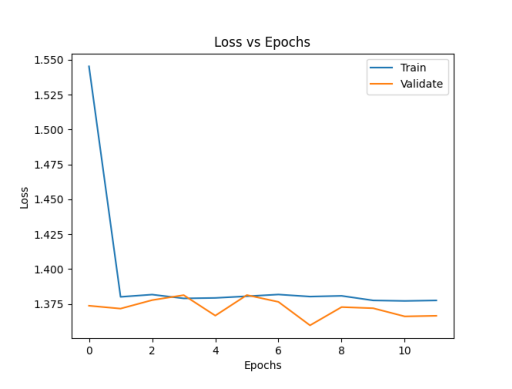

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = 'results/a1_TestDisease_train_loss.png'
image = Image.open(image_path)
image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()

### Age, sex and family history MLP (A2)

In [ ]:
featfile="test/featfiles/featfile_A2.csv"
model_type="baseline"
experiment=f"A2_{endpoint}"
loss='bce_weighted_single'
!python3 ./src/main.py --featfile $featfile --model_type $model_type --experiment $experiment --batchsize $batchsize --outpath $outpath --statfile $statfile --maskfile $maskfile --edgefile $edgefile --gnn_layer $gnn_layer --pooling_method $pooling_method --obs_window_start $obs_window_start --obs_window_end $obs_window_end --num_workers $num_workers --max_epochs $max_epochs --patience $patience --learning_rate $learning_rate --main_hidden_dim $main_hidden_dim --lstm_hidden_dim $lstm_hidden_dim --loss $loss --gamma $gamma --alpha $alpha --beta $beta --delta $delta --dropout_rate $dropout_rate --device $device

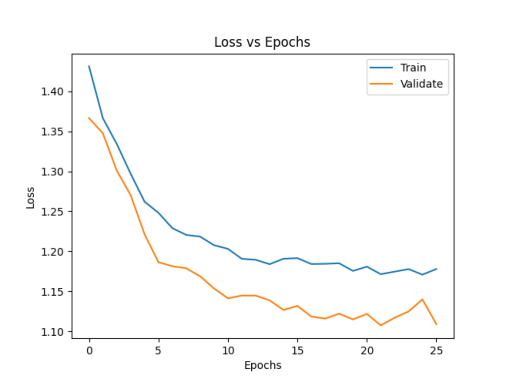

In [12]:
image_path = 'results/A2_TestDisease_train_loss.png'
image = Image.open(image_path)
image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()

### Age, sex and graph connectivity MLP (A3)

In [ ]:
featfile="test/featfiles/featfile_A3.csv"
model_type="baseline"
experiment=f"A3_{endpoint}"
loss='bce_weighted_single'
!python3 ./src/main.py --featfile $featfile --model_type $model_type --experiment $experiment --batchsize $batchsize --outpath $outpath --statfile $statfile --maskfile $maskfile --edgefile $edgefile --gnn_layer $gnn_layer --pooling_method $pooling_method --obs_window_start $obs_window_start --obs_window_end $obs_window_end --num_workers $num_workers --max_epochs $max_epochs --patience $patience --learning_rate $learning_rate --main_hidden_dim $main_hidden_dim --lstm_hidden_dim $lstm_hidden_dim --loss $loss --gamma $gamma --alpha $alpha --beta $beta --delta $delta --dropout_rate $dropout_rate --device $device

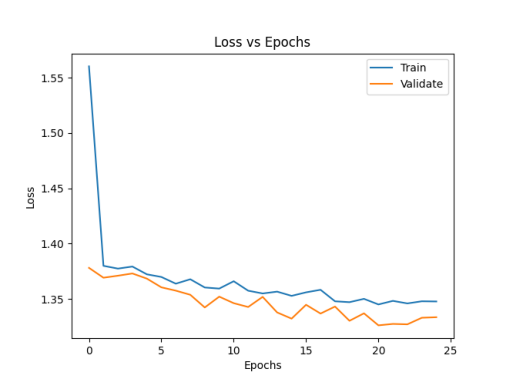

In [13]:
image_path = 'results/A3_TestDisease_train_loss.png'
image = Image.open(image_path)
image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()

### Age, sex and longitudinal EHR data LSTM (A4)

In [ ]:
featfile="test/featfiles/featfile_A4.csv"
model_type="baseline"
experiment=f"A4_{endpoint}"
loss='bce_weighted_single'
!python3 ./src/main.py --featfile $featfile --model_type $model_type --experiment $experiment --batchsize $batchsize --outpath $outpath --statfile $statfile --maskfile $maskfile --edgefile $edgefile --gnn_layer $gnn_layer --pooling_method $pooling_method --obs_window_start $obs_window_start --obs_window_end $obs_window_end --num_workers $num_workers --max_epochs $max_epochs --patience $patience --learning_rate $learning_rate --main_hidden_dim $main_hidden_dim --lstm_hidden_dim $lstm_hidden_dim --loss $loss --gamma $gamma --alpha $alpha --beta $beta --delta $delta --dropout_rate $dropout_rate --device $device --local_test

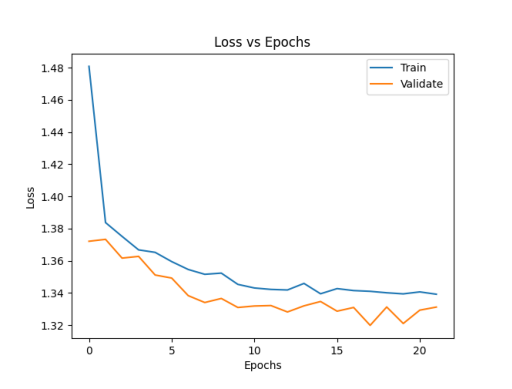

In [14]:
image_path = 'results/A4_TestDisease_train_loss.png'
image = Image.open(image_path)
image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()

### Age, sex, family history and longitudinal EHR data LSTM (A5)

In [ ]:
featfile="test/featfiles/featfile_A5.csv"
model_type="baseline"
experiment=f"A5_{endpoint}"
loss='bce_weighted_single'
!python3 ./src/main.py --featfile $featfile --model_type $model_type --experiment $experiment --batchsize $batchsize --outpath $outpath --statfile $statfile --maskfile $maskfile --edgefile $edgefile --gnn_layer $gnn_layer --pooling_method $pooling_method --obs_window_start $obs_window_start --obs_window_end $obs_window_end --num_workers $num_workers --max_epochs $max_epochs --patience $patience --learning_rate $learning_rate --main_hidden_dim $main_hidden_dim --lstm_hidden_dim $lstm_hidden_dim --loss $loss --gamma $gamma --alpha $alpha --beta $beta --delta $delta --dropout_rate $dropout_rate --device $device --local_test

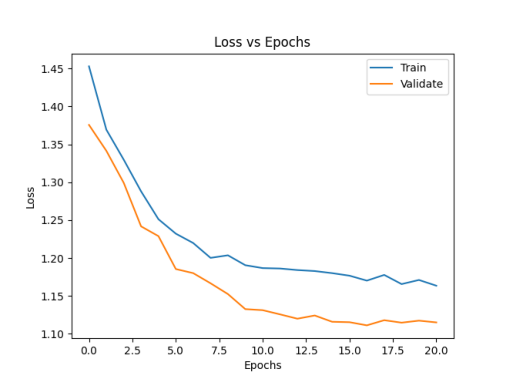

In [15]:
image_path = 'results/A5_TestDisease_train_loss.png'
image = Image.open(image_path)
image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()

# Results
In this section, you should finish training your model training or loading your trained model. That is a great experiment! You should share the results with others with necessary metrics and figures.

Please test and report results for all experiments that you run with:

*   specific numbers (accuracy, AUC, RMSE, etc)
*   figures (loss shrinkage, outputs from GAN, annotation or label of sample pictures, etc)


## Model comparison

In [18]:
import pandas as pd
a1 = pd.read_csv('results/a1_TestDisease_results.csv')
a2 = pd.read_csv('results/A2_TestDisease_results.csv')
a3 = pd.read_csv('results/A3_TestDisease_results.csv')
a4 = pd.read_csv('results/A4_TestDisease_results.csv')
a5 = pd.read_csv('results/A5_TestDisease_results.csv')

In [19]:
a1.head()

,actual,pred_raw,pred_raw_se,pred_binary
0,0.0,0.550845,0.020381,1
1,1.0,0.541918,0.003947,1
2,0.0,0.481395,0.012881,0
3,0.0,0.518933,0.019410,1
4,0.0,0.476725,0.002696,0


In [30]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score, roc_curve
def get_classification_threshold_auc(y_pred, y_actual):
    """For imbalanced classification we compute an optimal threshold using roc curve,
    based on results for validation data
    """
    fpr, tpr, thresholds = roc_curve(y_actual, y_pred)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    threshold = thresholds[ix]
    return threshold


def get_classification_threshold_precision_recall(y_pred, y_actual):
    thresholds = np.arange(0.1, 0.9, 0.001) # between 0.1 and 0.9 to exclude trivial values like 0 and 1
    scores = [f1_score(y_actual, (y_pred >= t).astype('int')) for t in thresholds]
    ix = np.argmax(scores)
    threshold = thresholds[ix]
    return threshold

In [41]:
def calculate_performance_metrics(results_df):
    y_actual = results_df['actual']
    y_pred_raw = results_df['pred_raw']

    # Compute Optimal Thresholds
    threshold_auc = get_classification_threshold_auc(y_pred_raw, y_actual)
    threshold_prc = get_classification_threshold_precision_recall(y_pred_raw, y_actual)

    # Compute F1 Score at Optimal Thresholds
    f1_at_auc_optimal = f1_score(y_actual, (y_pred_raw >= threshold_auc).astype('int'))
    f1_at_prc_optimal = f1_score(y_actual, (y_pred_raw >= threshold_prc).astype('int'))

    return {
        'Threshold (AUC Optimal)': threshold_auc,
        'Threshold (PRC Optimal)': threshold_prc,
        'F1 (AUC Optimal)': f1_at_auc_optimal,
        'F1 (PRC Optimal)': f1_at_prc_optimal
    }

In [40]:
result_dfs = [a1, a2, a3, a4, a5]

model_names = [
    "Age and sex MLP",
    "Age, sex and family history MLP",
    "Age, sex and graph connectivity MLP",
    "Age, sex and longitudinal EHR data LSTM",
    "Age, sex, family history and longitudinal EHR data LSTM"
]
all_model_metrics = {}

for model_name, results_df in zip(model_names, result_dfs):
    metrics = calculate_performance_metrics(results_df)
    all_model_metrics[model_name] = metrics

metrics_df = pd.DataFrame(all_model_metrics).T

metrics_df

,ROC AUC,PRC AUC,Threshold (AUC Optimal),Threshold (PRC Optimal),F1 (AUC Optimal),F1 (PRC Optimal)
Age and sex MLP,0.593150,0.146711,0.497552,0.502,0.232457,0.232280
"Age, sex and family history MLP",0.770105,0.280095,0.544916,0.647,0.340508,0.356589
"Age, sex and graph connectivity MLP",0.640038,0.168966,0.508827,0.508,0.254146,0.253665
"Age, sex and longitudinal EHR data LSTM",0.643346,0.168697,0.521184,0.533,0.255509,0.257180
"Age, sex, family history and longitudinal EHR data LSTM",0.769753,0.263706,0.545967,0.594,0.335044,0.350190


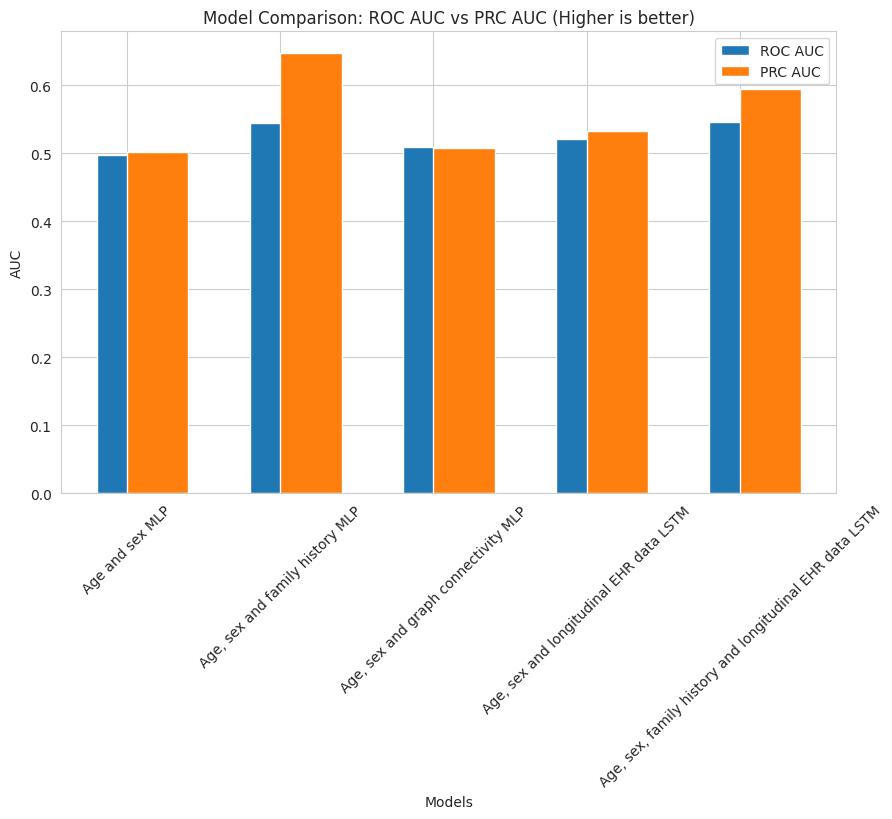

In [37]:
# @title Threshold (AUC Optimal) vs Threshold (PRC Optimal)

import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for ROC AUC and PRC AUC
plt.figure(figsize=(10, 6))
roc_auc = metrics_df['Threshold (AUC Optimal)']
prc_auc = metrics_df['Threshold (PRC Optimal)']
index = range(len(roc_auc))
plt.bar(index, roc_auc, width=0.4, label='ROC AUC', align='center')
plt.bar(index, prc_auc, width=0.4, label='PRC AUC', align='edge')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.xticks(index, model_names, rotation=45)
plt.legend()
plt.title('Model Comparison: ROC AUC vs PRC AUC (Higher is better)')
plt.show()

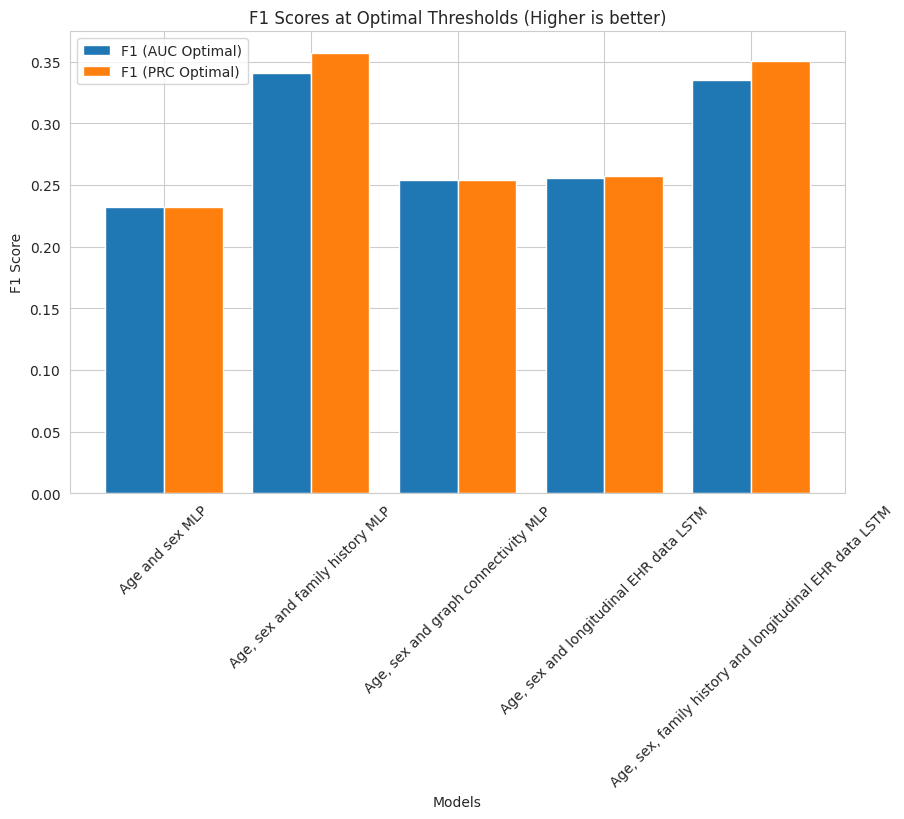

In [38]:
plt.figure(figsize=(10, 6))
f1_auc_optimal = metrics_df['F1 (AUC Optimal)']
f1_prc_optimal = metrics_df['F1 (PRC Optimal)']
width = 0.4
plt.bar(index, f1_auc_optimal, width, label='F1 (AUC Optimal)')
plt.bar([p + width for p in index], f1_prc_optimal, width, label='F1 (PRC Optimal)')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.xticks([p + width/2 for p in index], model_names, rotation=45)
plt.legend()
plt.title('F1 Scores at Optimal Thresholds (Higher is better)')
plt.show()

# Discussion

In this section,you should discuss your work and make future plan. The discussion should address the following questions:
  * Make assessment that the paper is reproducible or not.
  * Explain why it is not reproducible if your results are kind negative.
  * Describe “What was easy” and “What was difficult” during the reproduction.
  * Make suggestions to the author or other reproducers on how to improve the reproducibility.
  * What will you do in next phase.



In [ ]:
# no code is required for this section
'''
if you want to use an image outside this notebook for explanaition,
you can read and plot it here like the Scope of Reproducibility
'''

# References

<ul>
<li>
Sophie Wharrie, Zhiyu Yang, Andrea Ganna, Samuel Kaski: “Characterizing personalized effects of family information on disease risk using graph representation learning”, 2023, Proceedings of the 8th Machine Learning for Healthcare Conference,
  in Proceedings of Machine Learning Research, 219 (2023) 824-845; <a href='http://arxiv.org/abs/2304.05010'>arXiv:2304.05010</a>.
</li>
</ul>
